In [68]:
import Plots , Flux

In [61]:
# Generating a Dataset
X = trunc.(rand(250) * 500)
f(x) = @. x *3 + 45;
Y = f(X)
Y += randn(250) * 50

250-element Vector{Float64}:
 1149.3374954352716
  516.9162803697409
 1215.463509521573
  332.3989318864662
  415.7631489762478
  730.7296642909793
  489.9318445353357
 1355.6930014945324
  644.866920144064
  856.0691296469187
    ⋮
  516.6114732362975
  140.62542672495675
  905.0550425723644
  186.62088294438018
  218.35977650379158
  980.3785729606944
  146.5514216214667
  230.2738690066019
  841.3454430026297

In [62]:
X |> size

(250,)

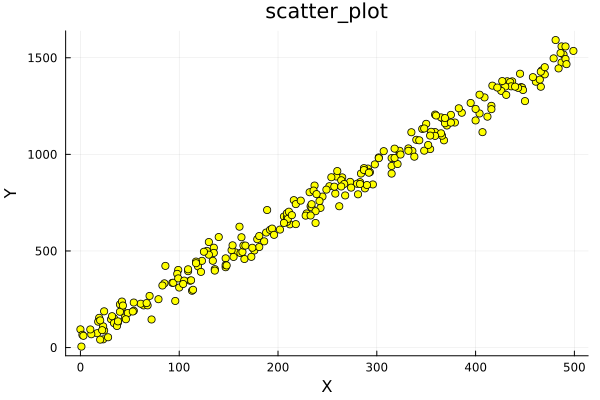

In [63]:
Plots.scatter(X,Y,color=:yellow,xlabel="X",ylabel="Y",
                title="scatter_plot",legend=false)

In [64]:
# Build a simple regressor
# The model needs to a loss function
simple_regressor(x,w,b) = @. w*x + b
MSE(y,ŷ) = sum((y.-ŷ).^2) / length(y)

MSE (generic function with 1 method)

In [65]:
@show W = rand(Float32,1,1)

@show b = [0.0f0]

W = rand(Float32, 1, 1) = Float32[0.1653043;;]
b = [0.0f0] = Float32[0.0]


1-element Vector{Float32}:
 0.0

In [66]:
ŷ = simple_regressor(X,W,b)
loss = MSE(Y,ŷ)

679946.6149702403

In [67]:
size(ŷ)

(250, 1)

In [ ]:
# Training the model
# Learning Rate
ŋ = 0.01
